In [1]:
import numpy as np
import pandas as pd 
from scipy.stats import spearmanr 
np.set_printoptions(precision=3)


In [2]:


data = np.array([
# year, sales, revenue, profit, A_cnt, B_cnt, C_cnt, A_cost, B_cost, C_cost, X_sales, Y_sales, Z_sales
    [2018, 120000, 330000000,  52000000, 12,  4,  3, 20000000, 10000000, 3000000, 50000, 40000, 30000],
    [2019, 150000, 360000000,  58000000, 10,  5,  6, 20000000, 10000000, 3000000, 60000, 50000, 40000],
    [2020, 180000, 380000000,  62000000,  8,  7, 10, 20000000, 10000000, 3000000, 70000, 60000, 50000],
    [2021, 165000, 350000000,  55000000,  9,  5, 15, 20000000, 10000000, 3000000, 65000, 55000, 45000],
    [2022, 180000, 380000000,  48000000,  6,  7, 20, 20000000, 10000000, 3000000, 60000, 50000, 40000],
    [2023, 300000, 470000000,  90000000,  4,  10, 26, 20000000, 10000000, 3000000,130000, 90000, 80000]
])


# 데이터 특징
columns = [
    "년도(0)",
    "판매량(1)",
    "매출(2)",
    "순이익(3)",
    "광고A횟수(4)",
    "광고B횟수(5)",
    "광고C횟수(6)",
    "광고A단가(7)",
    "광고B단가(8)",
    "광고C단가(9)",
    "지역X판매량(10)",
    "지역Y판매량(11)",
    "지역Z판매량(12)"
]
year = data[:,0]
sales = data[:,1]
revenue = data[:,2]
profit = data[:,3]
adAcnt = data[:,4]
adBcnt = data[:,5]
adCcnt = data[:,6]
adAcost = data[:,7]
adBcost = data[:,8]
adCcost = data[:,9]
Xsales = data[:,10]
Ysales = data[:,11]
Zsales = data[:,12]

#새로운 값 데이터에 추가하기
new_profit = revenue - (adAcnt * adAcost + adBcnt * adBcost + adCcnt * adCcost)
data[:,3] = new_profit


#pandas사용해서 표로 확인하기
df = pd.DataFrame(data, columns=columns)
df



,년도(0),판매량(1),매출(2),순이익(3),광고A횟수(4),광고B횟수(5),광고C횟수(6),광고A단가(7),광고B단가(8),광고C단가(9),지역X판매량(10),지역Y판매량(11),지역Z판매량(12)
0,2018,120000,330000000,41000000,12,4,3,20000000,10000000,3000000,50000,40000,30000
1,2019,150000,360000000,92000000,10,5,6,20000000,10000000,3000000,60000,50000,40000
2,2020,180000,380000000,120000000,8,7,10,20000000,10000000,3000000,70000,60000,50000
3,2021,165000,350000000,75000000,9,5,15,20000000,10000000,3000000,65000,55000,45000
4,2022,180000,380000000,130000000,6,7,20,20000000,10000000,3000000,60000,50000,40000
5,2023,300000,470000000,212000000,4,10,26,20000000,10000000,3000000,130000,90000,80000


In [3]:
#spearman
    #rho : spearman 상관계수 , -1 ~ 1
        #1 : 완전한 양의 상관관계(1에 가까울 수록 강한 양의 상관관계)
        #-1 : 완전한 음의 상관관계
    #p-value : 이 관계가 우연일 확률
        #보통 기준 : 0.05 / 이상이면 우연일 가능성이 큼 -> 상관관계가 없다 판단


#1. 어떤 광고가 매출에 가장 큰 영향을 미치는가?
rho_A, p_A = spearmanr(adAcnt, revenue)
print("광고 A ↔ 매출 Spearman:", rho_A, "p-value:", p_A)
rho_B, p_B = spearmanr(adBcnt, revenue)
print("광고 B ↔ 매출 Spearman:", rho_B, "p-value:", p_B)
rho_C, p_C = spearmanr(adCcnt, revenue)
print("광고 C ↔ 매출 Spearman:", rho_C, "p-value:", p_C)


광고 A ↔ 매출 Spearman: -0.9276336570439175 p-value: 0.007665844187473165
광고 B ↔ 매출 Spearman: 0.985184366143778 p-value: 0.00032762847175466783
광고 C ↔ 매출 Spearman: 0.7826908981308054 p-value: 0.06570384807158906


광고 A : 매년 횟수를 줄여나갔음에도 매출이 증가 (음의 상관관계)

광고B : 매년 횟수를 늘려갈수록 매출도 강하게 증가 / 횟수를 줄이니 매출도 감소

광고C : 매년 횟수를 늘려갈수록 매출도 증가했으나
횟수를 늘렸음에도 매출이 감소한 해가 있는걸로 보아 우연일 확률 있음

In [4]:
#2. 어떤 광고가 순이익에 가장 큰 영향을 미치는가?
rho_A, p_A = spearmanr(adAcnt, profit)
print("광고 A ↔ 순이익 Spearman:", rho_A, "p-value:", p_A)
rho_B, p_B = spearmanr(adBcnt, profit)
print("광고 B ↔ 순이익 Spearman:", rho_B, "p-value:", p_B)
rho_C, p_C = spearmanr(adCcnt, profit)
print("광고 C ↔ 순이익 Spearman:", rho_C, "p-value:", p_C)

광고 A ↔ 순이익 Spearman: -0.942857142857143 p-value: 0.0048046647230320545
광고 B ↔ 순이익 Spearman: 0.9710083124552246 p-value: 0.0012485929031976688
광고 C ↔ 순이익 Spearman: 0.8285714285714287 p-value: 0.04156268221574334


매출과 순이익은 비슷한 결과를 보임
광고 C는 매출에는 불안정하지만 순이익에는 기여도가 안정적인
"저비용, 보조형" 광고임을 알 수 있다

In [ ]:
import seaborn as sns #시각화
import matplotlib.pyplot as plt #시각화

#데이터 생성
np.random.seed(42)
months = np.arange(1,25) #24개월
adv = np.random.normal(500,50,24) #평균, 편차, 개수
visitors = adv*2.5 + np.random.normal(0,100,24)
    #광고비 늘수록 방문자 수가 증가하는 건 당연 -> 다중공선성 후보
discount_rate = np.random.choice([0,10,20,30],24)
    #할인이 늘수록 판매량이 증가? but 순이익은?
reviews = visitors*0.1 + np.random.normal(0,3,24)
    #리뷰 수 : (긍정적인)리뷰 많을수록 판매량 늘 것이다
temp = np.random.normal(15,10,24)
    #온도, 관계성이 없을 것 같은 변수
profit = (visitors * 0.5) + (reviews * 20) - (adv * 0.8) - (discount_rate * 50) + np.random.normal(0, 200, 24)
    #회귀분석으로 구해야할 공식, but 임의로 설정
    #광고랑 할인 너무 많이하면 순이익 깍임
df = pd.DataFrame({
    'adv_spend': adv,
    'visitors': visitors,
    'discount_rate': discount_rate,
    'reviews': reviews,
    'temp': temp,
    'profit': profit
})

### 변수간 상관관계 (Spearman) ###


c:\Users\bhc02\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\bhc02\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\bhc02\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\bhc02\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\bhc02\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\U

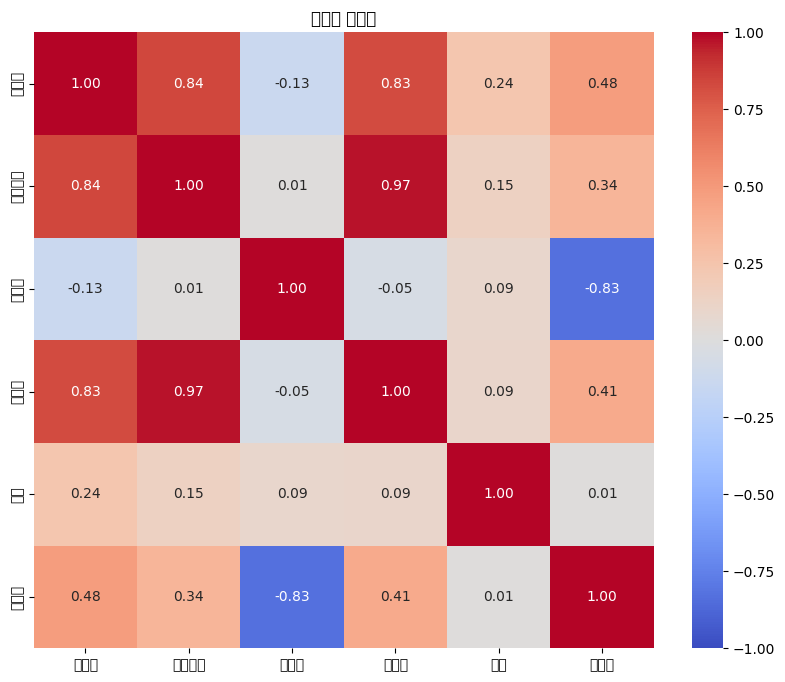

In [6]:

print("### 변수간 상관관계 (Spearman) ###")
# 히트맵으로 시각화, 모든 수치형 변수 판단해보기
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("순이익 히트맵")
plt.show()

In [7]:
def get_spearman_pvalue(df, target_col):
    print(f"\n### '{target_col}'와의 관계 분석 (p-value 포함) ###")
    print(f"{'변수명':<10} | {'Correlation':<12} | {'p-value':<10} | {'해석'}")
    print("-" * 60)
    
    for col in df.columns:
        if col != target_col:
            rho, p_val = spearmanr(df[col], df[target_col])
            
            significance = "유의미함" if p_val < 0.05 else "우연임"
            print(f"{col:<10} | {rho:.4f}       | {p_val:.4f}   | {significance}")

get_spearman_pvalue(df, '순이익')


### '순이익'와의 관계 분석 (p-value 포함) ###
변수명        | Correlation  | p-value    | 해석
------------------------------------------------------------
광고비        | 0.4817       | 0.0171   | 유의미함
방문자수       | 0.3443       | 0.0994   | 우연임
할인율        | -0.8287       | 0.0000   | 유의미함
리뷰수        | 0.4122       | 0.0453   | 유의미함
기온         | 0.0104       | 0.9614   | 우연임
